# General Questions
    a. How many rows and columns does the dataframe have?
    b. Are there any missing values in the dataframe?
    c. What is the data type of each column?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

df_final = pd.read_csv("df_final.csv")
df_final.shape
df_final.isna().sum()


df_final['Date']=pd.to_datetime(df_final['Date'])
df_columns = df_final.dtypes
df_columns


Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
Description             object
HolidayNames            object
Type                    object
Size                     int64
Year                     int64
Month                    int64
Day                      int64
Super_Bowl                bool
Labor_Day                 bool
Thanksgiving              bool
Christmas                 bool
dtype: object

In [ ]:
df_final

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,HolidayNames,Type,Size,Year,Month,Day,Super_Bowl,Labor_Day,Thanksgiving,Christmas
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,...,Not a holiday,A,151315,2010,2,5,False,False,False,False
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,...,Superbowl,A,151315,2010,2,12,True,False,False,False
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,...,Not a holiday,A,151315,2010,2,19,False,False,False,False
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,...,Not a holiday,A,151315,2010,2,26,False,False,False,False
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,...,Not a holiday,A,151315,2010,3,5,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421549,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,...,Not a holiday,B,118221,2012,9,28,False,False,False,False
421550,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,NaN,18.82,...,Not a holiday,B,118221,2012,10,5,False,False,False,False
421551,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,NaN,7.89,...,Not a holiday,B,118221,2012,10,12,False,False,False,False
421552,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,NaN,3.18,...,Not a holiday,B,118221,2012,10,19,False,False,False,False


# Group Mean Average
    a. For which columns are you calculating the group mean average?
    b. Are there specific categories/groups within those columns?
    c. Which column values are you averaging for each group?
    d. How does the mean value vary across the different groups?

In [ ]:
dept_sales = df_final[['Dept', 'Weekly_Sales']]
dept_sales_pivot = dept_sales.pivot_table(values='Weekly_Sales', columns = 'Dept', aggfunc='mean')


dept_sales_pivot

Dept,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
Weekly_Sales,19213.485088,43607.020113,11793.698516,25974.630238,21365.583515,4747.856188,24161.237413,30191.263517,20206.681878,18321.272351,...,45232.084488,33687.910758,75204.870531,27008.060746,33405.883963,69824.42308,15210.942761,14255.576919,6824.694889,415.487065


In [ ]:
df_final.groupby('Type')['Weekly_Sales'].mean().idxmax()
# It is seen that type A has the highest average of weekly sales

'A'

In [ ]:
holidaynames_sales = df_final[['HolidayNames', 'Weekly_Sales']]

holidaynames_sales_pivot = holidaynames_sales.pivot_table(values='Weekly_Sales', columns = 'HolidayNames', aggfunc='mean')
holidaynames_sales_pivot

HolidayNames,Christmas,Labor Day,Not a holiday,Superbowl,Thanksgiving
Weekly_Sales,14543.387158,15883.484342,15902.053287,16377.996441,22220.944538


In [ ]:
df_final.groupby('HolidayNames')['Weekly_Sales'].mean().idxmax()
#It is seen that on Thanksgiving the average weekly sales is the highest

'Thanksgiving'

In [ ]:
store_sales = df_final[['Store', 'Weekly_Sales']]
store_sales_pivot = store_sales.pivot_table(values='Weekly_Sales', columns = 'Store', aggfunc='mean')
store_sales_pivot

Store,1,2,3,4,5,6,7,8,9,10,...,36,37,38,39,40,41,42,43,44,45
Weekly_Sales,21710.543621,26908.582335,6373.033983,29164.049442,5053.415813,21913.243624,8358.766148,13133.014768,8772.890379,26332.303819,...,8584.412563,10297.355026,7492.47846,21000.763562,13763.632803,17976.004648,11443.370118,13415.114118,6038.929814,11662.897315


In [ ]:
df_final.groupby('Store')['Weekly_Sales'].mean().idxmax()
# It is seen that store 20 has the highest average weekly sales.

20

# Outliers
    a. Which columns are you considering for outlier detection?
    b. What method will you use for detecting outliers (e.g., IQR, Z-Score)?
    c. How many outliers are detected in each column?
    d. What percentage of the data in each column is considered an outlier?

In [ ]:
#The columns considered for outlier detection include those that contain quantitative data such as 
#'Weekly Sales', 'Temperature', 'Fuel Price', 'CPI','Unemployment', and 'Size'.

In [ ]:
#The method used for detecting outliers will be the Z-Score method which is easily interpretable and 
#suitable for identifying outliers in normally distributed or approximately normally distributed data.

In [ ]:
#Outlier detection using Z-Score for each column

import numpy as np

#Outliers in Weekly_Sales:
weekly_sales_mean = df_final['Weekly_Sales'].mean()
weekly_sales_std = df_final['Weekly_Sales'].std()
df_final['Z_Score_weekly_sales'] = np.abs((df_final['Weekly_Sales'] - weekly_sales_mean) / weekly_sales_std)
threshold = 3
outliers_weekly_sales = df_final[df_final['Z_Score_weekly_sales'] > threshold]

#Outliers in Size:
size_mean = df_final['Size'].mean()
size_std = df_final['Size'].std()
df_final['Z_Score_size'] = np.abs((df_final['Size'] - size_mean) / size_std)
outliers_size = df_final[df_final['Z_Score_size'] > threshold]

#Outliers in Temperature:
temperature_mean = df_final['Temperature'].mean()
temperature_std = df_final['Temperature'].std()
df_final['Z_Score_temperature'] = np.abs((df_final['Temperature'] - temperature_mean) / temperature_std)
outliers_temperature = df_final[df_final['Z_Score_temperature'] > threshold]

#Outliers in Fuel Price:
fp_mean = df_final['Fuel_Price'].mean()
fp_std = df_final['Fuel_Price'].std()
df_final['Z_Score_fp'] = np.abs((df_final['Fuel_Price'] - fp_mean) / fp_std)
outliers_fp = df_final[df_final['Z_Score_fp'] > threshold]

#Outliers in CPI:
cpi_mean = df_final['CPI'].mean()
cpi_std = df_final['CPI'].std()
df_final['Z_Score_cpi'] = np.abs((df_final['CPI'] - cpi_mean) / cpi_std)
outliers_cpi = df_final[df_final['Z_Score_cpi'] > threshold]

#Outliers in Unemployment:
unemployment_mean = df_final['Unemployment'].mean()
unemployment_std = df_final['Unemployment'].std()
df_final['Z_Score_unemployment'] = np.abs((df_final['Unemployment'] - unemployment_mean) / unemployment_std)
outliers_unemployment = df_final[df_final['Z_Score_unemployment'] > threshold]

#Data points with Z-scores exceeding the threshold are considered outliers

In [ ]:
#Outlier detection using IQR for each column:
# List of columns to check for outliers
columns_to_check = ['Weekly_Sales', 'Size', 'Temperature','Fuel_Price','CPI','Unemployment']  # Replace with your column names

# Dictionary to store outliers for each column
outliers_dict = {}

for column_name in columns_to_check:
    q1 = df_final[column_name].quantile(0.25)
    q3 = df_final[column_name].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = df_final[(df_final[column_name] < lower_bound) | (df_final[column_name] > upper_bound)]
    outliers_dict[column_name] = outliers

# outliers_dict now contains outliers for each specified column
for column_name, outliers in outliers_dict.items():
    print(f"Outliers in {column_name} column:")
    print(outliers)

Outliers in Weekly_Sales column:
        Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  \
8           1     1 2010-04-02      57258.43      False        62.27   
46          1     1 2010-12-24      55931.23      False        52.33   
63          1     1 2011-04-22      50510.31      False        72.99   
106         1     1 2012-02-17      54060.10      False        45.32   
113         1     1 2012-04-06      57592.12      False        70.43   
...       ...   ...        ...           ...        ...          ...   
421269     45    95 2012-09-28      49380.11      False        64.88   
421270     45    95 2012-10-05      50241.01      False        64.89   
421271     45    95 2012-10-12      49334.77      False        54.47   
421272     45    95 2012-10-19      48434.97      False        56.47   
421273     45    95 2012-10-26      56017.47      False        58.85   

        Fuel_Price  MarkDown1  MarkDown2  MarkDown3  ...   HolidayNames  Type  \
8            2.719   

In [ ]:
#What percentage of the data in each column is considered an outlier?

total_data_points = df_final.shape[0]
outliers_weekly_sales_count = df_final[df_final['Z_Score_weekly_sales'] > threshold].shape[0]
percentage_outliers_wk = (outliers_weekly_sales_count / total_data_points) * 100
print('Weekly Sales',percentage_outliers_wk)

outliers_size_count = df_final[df_final['Z_Score_size'] > threshold].shape[0]
percentage_outliers_size = (outliers_size_count / total_data_points) * 100
print('Size',percentage_outliers_size)

outliers_temp_count = df_final[df_final['Z_Score_temperature'] > threshold].shape[0]
percentage_outliers_temp = (outliers_temp_count / total_data_points) * 100
print('Temperature',percentage_outliers_temp)

outliers_fp_count = df_final[df_final['Z_Score_fp'] > threshold].shape[0]
percentage_outliers_fp = (outliers_fp_count / total_data_points) * 100
print('Fuel Price',percentage_outliers_fp)

outliers_cpi_count = df_final[df_final['Z_Score_cpi'] > threshold].shape[0]
percentage_outliers_cpi = (outliers_cpi_count / total_data_points) * 100
print('CPI',percentage_outliers_cpi)

outliers_unemployment_count = df_final[df_final['Z_Score_unemployment'] > threshold].shape[0]
percentage_outliers_unemployment = (outliers_unemployment_count / total_data_points) * 100
print('Unemployment',percentage_outliers_unemployment)


Weekly Sales 2.098900733951048
Size 0.0
Temperature 0.016368009792339773
Fuel Price 0.0
CPI 0.0
Unemployment 3.2631643870061726


In [ ]:
# Calculate the percentage of outliers
percentage_outliers = (len(outliers) / len(df_final)) * 100
outlier_percentages[column_name] = percentage_outliers

# outlier_percentages now contains the percentage of outliers for each specified column
for column_name, percentage in outlier_percentages.items():
    print(f"Percentage of outliers in {column_name} column: {percentage:.2f}%")

NameError: name 'outlier_percentages' is not defined

# Univariate Analysis (single variable):
    a. What is the distribution of values in each numeric column?
    b. Which columns show a normal distribution? Which ones are skewed?
    c. What is the range, median, and mode of each numeric column?
    d. For categorical columns, how many unique categories are there? What is the frequency of each category?

## Numeric columns analysis

### Normal distribution
    1. Stores

### Right-skewed distribution
    1. Departments
    2. Weekly Sales
    3. Unemployment

### Left-skewed distribution
    1. Temperature
    2. Fuel Price
    3. CPI
    4. Size

In [ ]:
import matplotlib.pyplot as plt

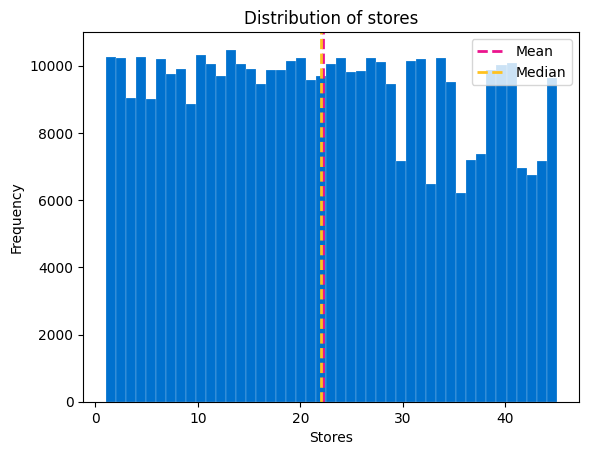

,mode,median,range
index,,,
Store,13,22.0,44


In [ ]:
#analysis of column "Store"
plt.hist(df_final["Store"], bins=45,
    edgecolor='white', color='#0071CE', linewidth=0.15)
plt.xlabel("Stores")
plt.ylabel("Frequency")
plt.title("Distribution of stores")

store_mean = np.mean(df_final["Store"])
plt.axvline(store_mean, color='#EB148D', 
    linestyle='dashed', linewidth=2, label='Mean')

store_median = np.median(df_final["Store"])
plt.axvline(store_median, color='#FFC220', 
    linestyle='dashed', linewidth=2, label='Median')

plt.legend()
plt.show()

#the mean and median lines are almost overlapping 
#in the middle of x axis => the distribution is normal

store_data = {
    "index": ["Store"],
    "mode": [df_final["Store"].mode().iloc[0]],
    "median": [store_median],
    "range": [df_final["Store"].max()-df_final["Store"].min()]
}

df_store_data = pd.DataFrame(store_data)
df_store_data.set_index("index")

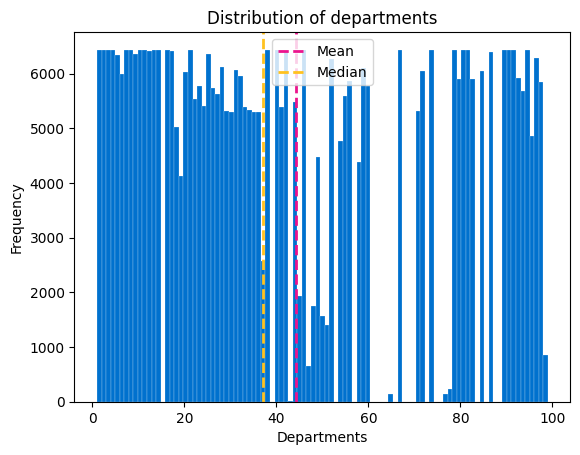

,mode,median,range
index,,,
Dept,1,37.0,98


In [ ]:
#analysis of column "Department"
plt.hist(df_final["Dept"], bins=99,
    edgecolor='white', color='#0071CE', linewidth=0.15)
plt.xlabel("Departments")
plt.ylabel("Frequency")
plt.title("Distribution of departments")

dept_mean = np.mean(df_final["Dept"])
plt.axvline(dept_mean, color='#EB148D', 
    linestyle='dashed', linewidth=2, label='Mean')

dept_median = np.median(df_final["Dept"])
plt.axvline(dept_median, color='#FFC220', 
    linestyle='dashed', linewidth=2, label='Median')

plt.legend()
plt.show()

#the mean value is greater than median =>
#the distribution is positive/right-skewed

dept_data = {
    "index": ["Dept"],
    "mode": [df_final["Dept"].mode().iloc[0]],
    "median": [dept_median],
    "range": [df_final["Dept"].max() - 
                        df_final["Dept"].min()]
}
df_dept_data = pd.DataFrame(dept_data)
df_dept_data.set_index("index")

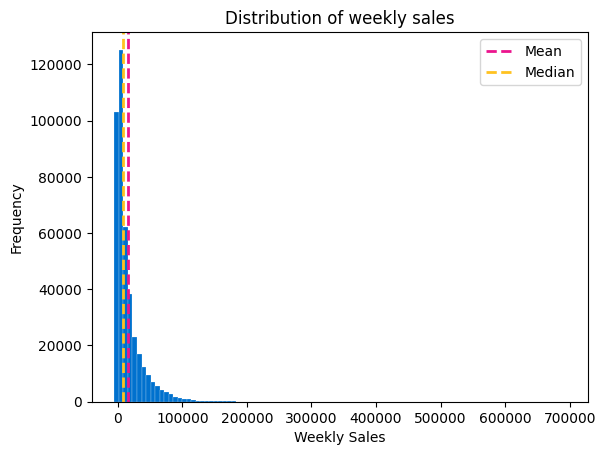

,mode,median,range
index,,,
Weekly Sales,10.0,7612.75,698088.3


In [ ]:
#analysis of column "Weekly Sales"
plt.hist(df_final["Weekly_Sales"], bins=100,
    edgecolor='white', color='#0071CE', linewidth=0.15)
plt.xlabel("Weekly Sales")
plt.ylabel("Frequency")
plt.title("Distribution of weekly sales")

sales_mean = np.mean(df_final["Weekly_Sales"])
plt.axvline(sales_mean, color='#EB148D', 
    linestyle='dashed', linewidth=2, label='Mean')

sales_median = np.median(df_final["Weekly_Sales"])
plt.axvline(sales_median, color='#FFC220', 
    linestyle='dashed', linewidth=2, label='Median')

plt.legend()
plt.show()

#the mean value is greater than median =>
#the distribution is positive/right-skewed

sales_data = {
    "index": ["Weekly Sales"],
    "mode": [df_final["Weekly_Sales"].mode().iloc[0]],
    "median": [sales_median],
    "range": [df_final["Weekly_Sales"].max() - 
                        df_final["Weekly_Sales"].min()]
}
df_sales_data = pd.DataFrame(sales_data)
df_sales_data.set_index("index")

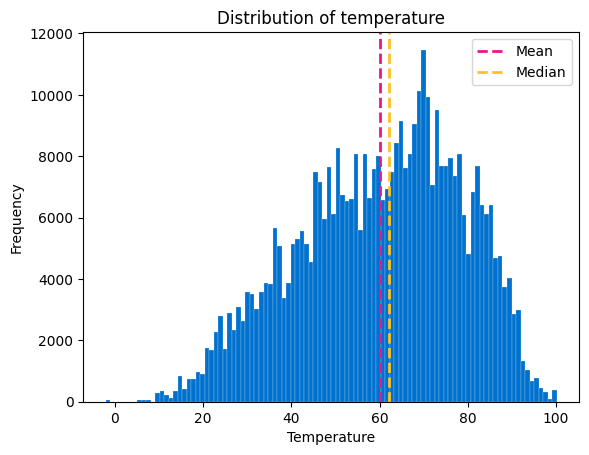

,mode,median,range
index,,,
Temperature,50.43,62.09,102.2


In [ ]:
#analysis of column "Temperature"
plt.hist(df_final["Temperature"], bins=100,
    edgecolor='white', color='#0071CE', linewidth=0.15)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Distribution of temperature")

temp_mean = np.mean(df_final["Temperature"])
plt.axvline(temp_mean, color='#EB148D', 
    linestyle='dashed', linewidth=2, label='Mean')

temp_median = np.median(df_final["Temperature"])
plt.axvline(temp_median, color='#FFC220', 
    linestyle='dashed', linewidth=2, label='Median')

plt.legend()
plt.show()

#the mean value is smaller than median =>
#the distribution is negative/left-skewed

temp_data = {
    "index": ["Temperature"],
    "mode": [df_final["Temperature"].mode().iloc[0]],
    "median": [temp_median],
    "range": [df_final["Temperature"].max() - 
                        df_final["Temperature"].min()]
}
df_temp_data = pd.DataFrame(temp_data)
df_temp_data.set_index("index")

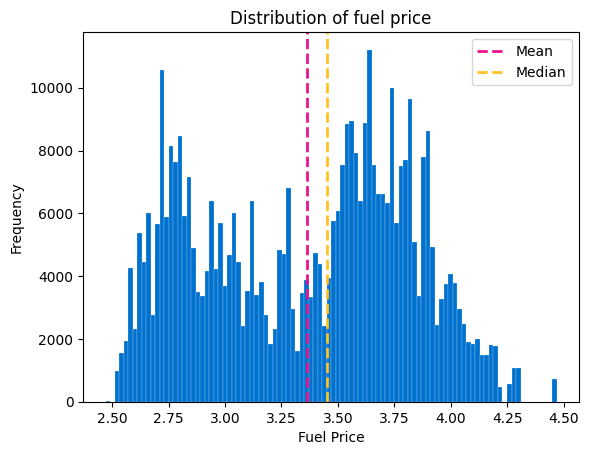

,mode,median,range
index,,,
Fuel Price,3.638,3.452,1.996


In [ ]:
#analysis of column "Fuel Price"
plt.hist(df_final["Fuel_Price"], bins=100,
    edgecolor='white', color='#0071CE', linewidth=0.15)
plt.xlabel("Fuel Price")
plt.ylabel("Frequency")
plt.title("Distribution of fuel price")

fuel_mean = np.mean(df_final["Fuel_Price"])
plt.axvline(fuel_mean, color='#EB148D', 
    linestyle='dashed', linewidth=2, label='Mean')

fuel_median = np.median(df_final["Fuel_Price"])
plt.axvline(fuel_median, color='#FFC220', 
    linestyle='dashed', linewidth=2, label='Median')

plt.legend()
plt.show()

#the mean value is smaller than median =>
#the distribution is negative/left-skewed

fuel_data = {
    "index": ["Fuel Price"],
    "mode": [df_final["Fuel_Price"].mode().iloc[0]],
    "median": [fuel_median],
    "range": [df_final["Fuel_Price"].max() - 
                        df_final["Fuel_Price"].min()]
}
df_fuel_data = pd.DataFrame(fuel_data)
df_fuel_data.set_index("index")

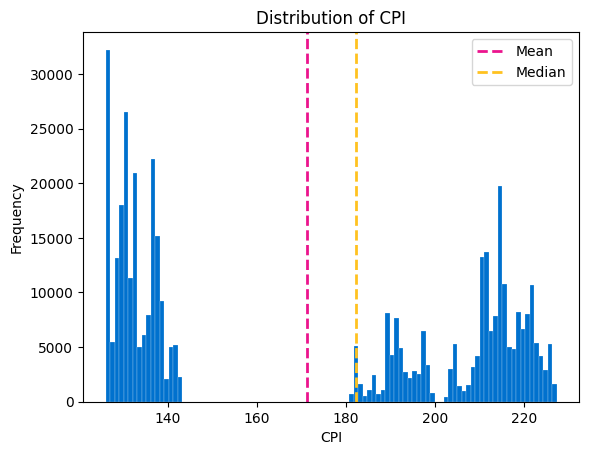

,mode,median,range
index,,,
CPI,129.855533,182.31878,101.168807


In [ ]:
#analysis of column "CPI"
plt.hist(df_final["CPI"], bins=100,
    edgecolor='white', color='#0071CE', linewidth=0.15)
plt.xlabel("CPI")
plt.ylabel("Frequency")
plt.title("Distribution of CPI")

cpi_mean = np.mean(df_final["CPI"])
plt.axvline(cpi_mean, color='#EB148D', 
    linestyle='dashed', linewidth=2, label='Mean')

cpi_median = np.median(df_final["CPI"])
plt.axvline(cpi_median, color='#FFC220', 
    linestyle='dashed', linewidth=2, label='Median')

plt.legend()
plt.show()

#the mean value is smaller than median =>
#the distribution is negative/left-skewed

cpi_data = {
    "index": ["CPI"],
    "mode": [df_final["CPI"].mode().iloc[0]],
    "median": [cpi_median],
    "range": [df_final["CPI"].max() - 
                        df_final["CPI"].min()]
}
df_cpi_data = pd.DataFrame(cpi_data)
df_cpi_data.set_index("index")

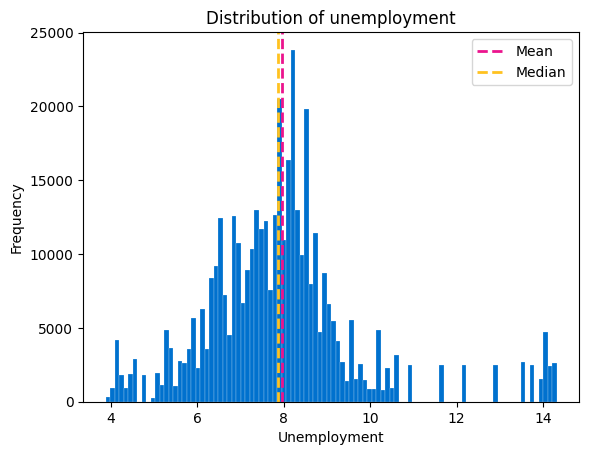

,mode,median,range
index,,,
Unemployment,8.099,7.866,10.434


In [ ]:
#analysis of column "Unemployment"
plt.hist(df_final["Unemployment"], bins=100,
    edgecolor='white', color='#0071CE', linewidth=0.15)
plt.xlabel("Unemployment")
plt.ylabel("Frequency")
plt.title("Distribution of unemployment")

unemp_mean = np.mean(df_final["Unemployment"])
plt.axvline(unemp_mean, color='#EB148D', 
    linestyle='dashed', linewidth=2, label='Mean')

unemp_median = np.median(df_final["Unemployment"])
plt.axvline(unemp_median, color='#FFC220', 
    linestyle='dashed', linewidth=2, label='Median')

plt.legend()
plt.show()

#the mean value is greater than median =>
#the distribution is positive/right-skewed

unemp_data = {
    "index": ["Unemployment"],
    "mode": [df_final["Unemployment"].mode().iloc[0]],
    "median": [unemp_median],
    "range": [df_final["Unemployment"].max() - 
                        df_final["Unemployment"].min()]
}
df_unemp_data = pd.DataFrame(unemp_data)
df_unemp_data.set_index("index")

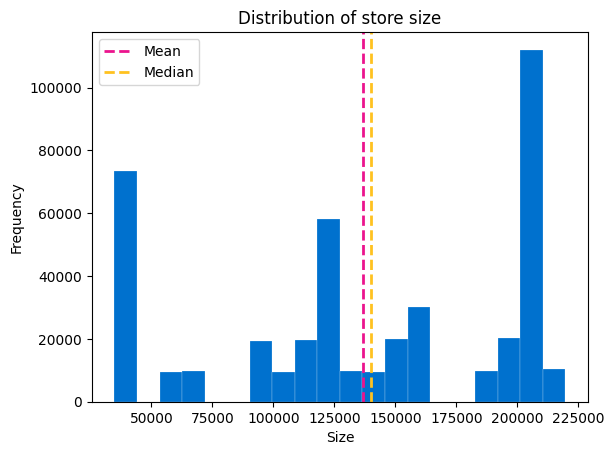

,mode,median,range
index,,,
Size,39690,140167.0,184747


In [ ]:
#analysis of column "Size"
plt.hist(df_final["Size"], bins=20,
    edgecolor='white', color='#0071CE', linewidth=0.15)
plt.xlabel("Size")
plt.ylabel("Frequency")
plt.title("Distribution of store size")

size_mean = np.mean(df_final["Size"])
plt.axvline(size_mean, color='#EB148D', 
    linestyle='dashed', linewidth=2, label='Mean')

size_median = np.median(df_final["Size"])
plt.axvline(size_median, color='#FFC220', 
    linestyle='dashed', linewidth=2, label='Median')

plt.legend()
plt.show()

#the mean value is smaller than median =>
#the distribution is negative/left-skewed

size_data = {
    "index": ["Size"],
    "mode": [df_final["Size"].mode().iloc[0]],
    "median": [size_median],
    "range": [df_final["Size"].max() - 
                        df_final["Size"].min()]
}
df_size_data = pd.DataFrame(size_data)
df_size_data.set_index("index")

In [ ]:
#range, median, and mode of each numeric column
df_final_numeric_data = pd.concat([df_sales_data, df_temp_data, df_fuel_data, df_dept_data, 
                        df_store_data, df_cpi_data, df_unemp_data, df_size_data], axis=0)
df_final_numeric_data = df_final_numeric_data.set_index("index")
df_final_numeric_data

,mode,median,range
index,,,
Weekly Sales,10.000000,7612.75000,698088.300000
Temperature,50.430000,62.09000,102.200000
Fuel Price,3.638000,3.45200,1.996000
Dept,1.000000,37.00000,98.000000
Store,13.000000,22.00000,44.000000
CPI,129.855533,182.31878,101.168807
Unemployment,8.099000,7.86600,10.434000
Size,39690.000000,140167.00000,184747.000000


## Categorical columns analysis

For categorical columns, how many unique categories are there?

In [ ]:
#columns with categorical data
categorical_columns = ["index", "IsHoliday", "Description", "HolidayNames", "Type", "Super_Bowl", 
                        "Labor_Day", "Thanksgiving", "Christmas"]

#put them in a dataframe
df_final_categorical_data = pd.DataFrame(columns=categorical_columns)

#set index
df_final_categorical_data["index"] = ["unique categories"]

#count for each of the categorical columns in df_final the amount of unique values and store them in 
#the df_final_categorical_data columns accordingly 
for i in categorical_columns[1:]:
    df_final_categorical_data[i] = [df_final[i].nunique()]

df_final_categorical_data = df_final_categorical_data.set_index("index")
df_final_categorical_data

,IsHoliday,Description,HolidayNames,Type,Super_Bowl,Labor_Day,Thanksgiving,Christmas
index,,,,,,,,
unique categories,2,78,5,3,2,2,2,2


Frequency of each category

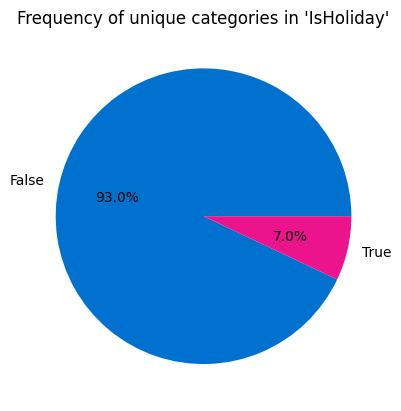

,IsHoliday
False,391894
True,29660


In [ ]:
#create a dataframe where we'll store the number
#of occurences of each unique category
df_isholiday_values=pd.DataFrame(df_final["IsHoliday"].
                                        value_counts())

#only 2 unique categories so pie chart would work :)
plt.pie(df_isholiday_values["IsHoliday"], 
        labels=df_isholiday_values.index, autopct='%1.1f%%', 
        colors=['#0071CE', '#EB148D', '#FFC220'])
plt.title("Frequency of unique categories in 'IsHoliday'")
plt.show()

df_isholiday_values

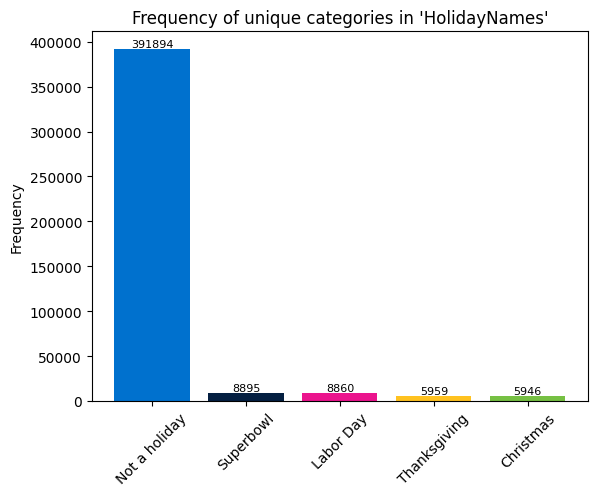

,HolidayNames
Not a holiday,391894
Superbowl,8895
Labor Day,8860
Thanksgiving,5959
Christmas,5946


In [ ]:
#create a dataframe where we'll store the number
#of occurences of each unique category
hn_val = df_final["HolidayNames"].value_counts()
df_holidaynames_values=pd.DataFrame(hn_val)

#plot bar chart 
plt.bar(df_holidaynames_values.index,
        df_holidaynames_values["HolidayNames"], 
        color=['#0071CE', "#041F41", '#EB148D', 
        '#FFC220', "#76C043"])
plt.title("Frequency of unique categories in 'HolidayNames'")
plt.xticks(rotation=45)
plt.ylabel("Frequency")

for i, freq in enumerate(hn_val):
    plt.text(i, freq + 1, str(freq), ha='center', 
             va='bottom', fontsize=8)
plt.show()

df_holidaynames_values

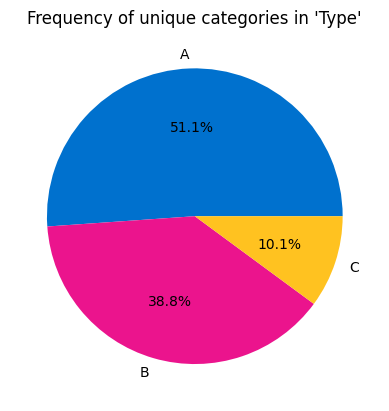

,Type
A,215463
B,163494
C,42597


In [ ]:
#create a dataframe where we'll store the number
#of occurences of each unique category
df_type_values=pd.DataFrame(df_final["Type"].
                                        value_counts())

#plot pie chart
plt.pie(df_type_values["Type"], 
        labels=df_type_values.index, autopct='%1.1f%%', 
        colors=['#0071CE', '#EB148D',  
                '#FFC220', "#76C043"])
plt.title("Frequency of unique categories in 'Type'")
plt.show()

df_type_values

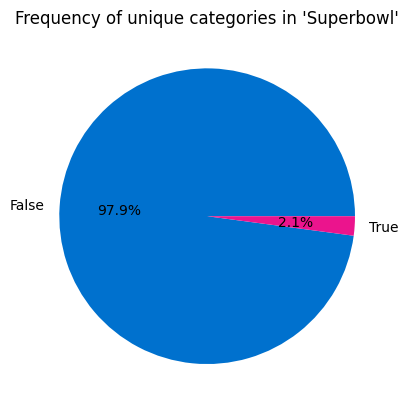

,Super_Bowl
False,412659
True,8895


In [ ]:
#create a dataframe where we'll store the number
#of occurences of each unique category
df_sbowl_values=pd.DataFrame(df_final["Super_Bowl"].
                                        value_counts())

#plot pie chart
plt.pie(df_sbowl_values["Super_Bowl"], 
        labels=df_sbowl_values.index, autopct='%1.1f%%', 
        colors=['#0071CE', '#EB148D',  
                '#FFC220', "#76C043"])
plt.title("Frequency of unique categories in 'Superbowl'")
plt.show()

df_sbowl_values

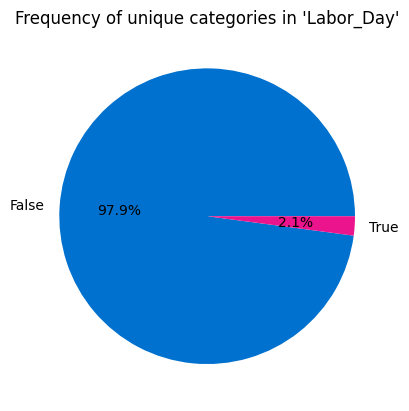

,Labor_Day
False,412694
True,8860


In [ ]:
#create a dataframe where we'll store the number
#of occurences of each unique category
df_labor_values=pd.DataFrame(df_final["Labor_Day"].
                                        value_counts())

#plot pie chart
plt.pie(df_labor_values["Labor_Day"], 
        labels=df_labor_values.index, autopct='%1.1f%%', 
        colors=['#0071CE', '#EB148D',  
                '#FFC220', "#76C043"])
plt.title("Frequency of unique categories in 'Labor_Day'")
plt.show()

df_labor_values

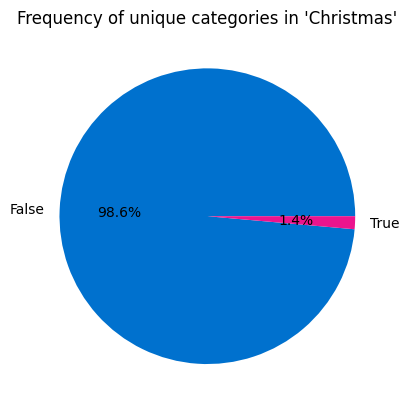

,Christmas
False,415608
True,5946


In [ ]:
#create a dataframe where we'll store the number
#of occurences of each unique category
df_xmas_values=pd.DataFrame(df_final["Christmas"].
                                        value_counts())

#plot pie chart
plt.pie(df_xmas_values["Christmas"], 
        labels=df_xmas_values.index, autopct='%1.1f%%', 
        colors=['#0071CE', '#EB148D',  
                '#FFC220', "#76C043"])
plt.title("Frequency of unique categories in 'Christmas'")
plt.show()

df_xmas_values

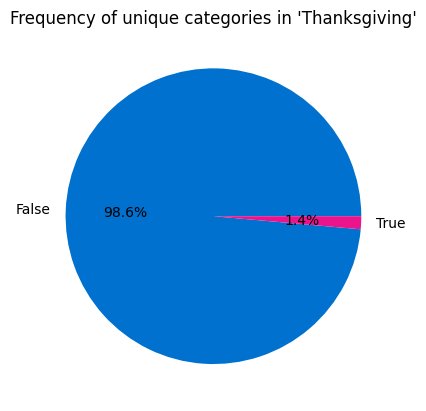

,Thanksgiving
False,415595
True,5959


In [ ]:
#create a dataframe where we'll store the number
#of occurences of each unique category
df_thanks_values=pd.DataFrame(df_final["Thanksgiving"].
                                        value_counts())

#plot pie chart
plt.pie(df_thanks_values["Thanksgiving"], 
        labels=df_thanks_values.index, autopct='%1.1f%%', 
        colors=['#0071CE', '#EB148D',  
                '#FFC220', "#76C043"])
plt.title("Frequency of unique categories in 'Thanksgiving'")
plt.show()

df_thanks_values

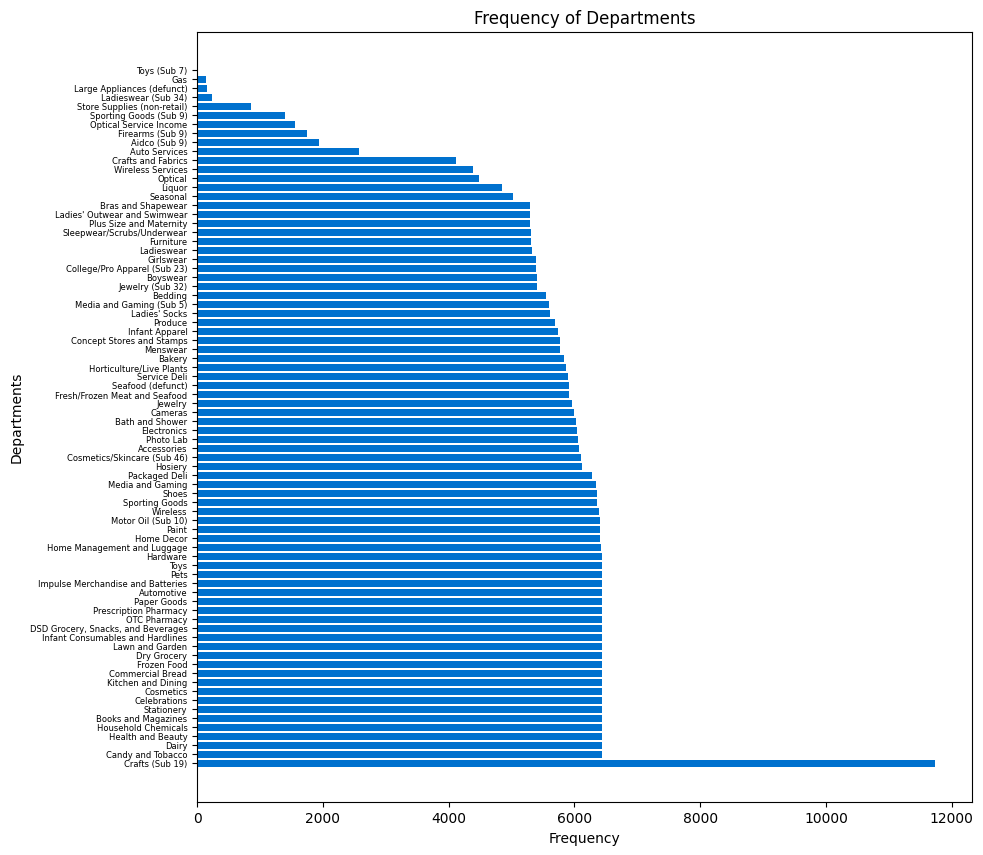

,Description
Crafts (Sub 19),11739
Candy and Tobacco,6435
Dairy,6435
Health and Beauty,6435
Household Chemicals,6435
...,...
Store Supplies (non-retail),862
Ladieswear (Sub 34),235
Large Appliances (defunct),150
Gas,143


In [ ]:
#create a dataframe where we'll store the number of occurences of each unique category
desc_val = df_final["Description"].value_counts()
df_description_values=pd.DataFrame(desc_val)

#plot a horizontal bar chart for all unique categories
plt.figure(figsize=(10, 10)) 
plt.barh(df_description_values.index, df_description_values["Description"], color = '#0071CE')
plt.yticks(fontsize=6)
plt.xlabel("Frequency")
plt.ylabel("Departments")
plt.title("Frequency of Departments")
plt.show()

df_description_values

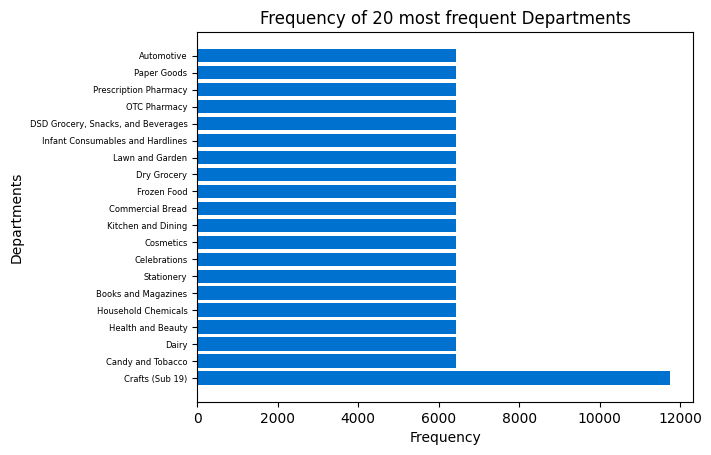

In [ ]:
#the number of departments is very big, so for a better overview we also added the first 20 departments separately

plt.barh(df_description_values.index[:20], df_description_values["Description"][:20], color = '#0071CE')
plt.yticks(fontsize=6)
plt.xlabel("Frequency")
plt.ylabel("Departments")
plt.title("Frequency of 20 most frequent Departments")
plt.show()

## Bivariate Analysis (numeric vs. numeric):
    a. Which numeric columns are you comparing against each other?
    b. Is there any correlation between the columns? If so, is it positive or negative?
    c. Can you visualize the relationship using scatter plots or (regression lines)?
    d. Are there any patterns or clusters evident when comparing two numeric columns?

In [ ]:
correlation = df_final[['CPI','Weekly_Sales','Temperature', 'Fuel_Price', 'Unemployment', 'Size', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].corr()
correlation
#Positive correlation: There is one strongly positive correlation between MarkDown1 and MarkDown4 of 0.819.

#Slight Positive Correlation: There is a slight positive correlation (0.244) between store size and weekly sales, indicating a direct relationship.

#Negative Correlations: Weekly sales exhibit negative correlations with fuel prices (-0.00011), temperature (-0.0023), and unemployment (-0.026).

,CPI,Weekly_Sales,Temperature,Fuel_Price,Unemployment,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
CPI,1.000000,-0.020932,0.182117,-0.164179,-0.299958,-0.003301,-0.055556,-0.039552,-0.023598,-0.049644,0.060629
Weekly_Sales,-0.020932,1.000000,-0.002321,-0.000109,-0.025861,0.243863,0.085256,0.024117,0.060380,0.045404,0.090362
Temperature,0.182117,-0.002321,1.000000,0.143852,0.096732,-0.058303,-0.040613,-0.323929,-0.096880,-0.063955,-0.017547
Fuel_Price,-0.164179,-0.000109,0.143852,1.000000,-0.033854,0.003340,0.061368,-0.220885,-0.102086,-0.044970,-0.128077
Unemployment,-0.299958,-0.025861,0.096732,-0.033854,1.000000,-0.068242,0.050283,0.020947,0.012821,0.024969,-0.003843
Size,-0.003301,0.243863,-0.058303,0.003340,-0.068242,1.000000,0.345688,0.108848,0.048922,0.168220,0.304592
MarkDown1,-0.055556,0.085256,-0.040613,0.061368,0.050283,0.345688,1.000000,0.024487,-0.108115,0.819244,0.160256
MarkDown2,-0.039552,0.024117,-0.323929,-0.220885,0.020947,0.108848,0.024487,1.000000,-0.050110,-0.007772,-0.007442
MarkDown3,-0.023598,0.060380,-0.096880,-0.102086,0.012821,0.048922,-0.108115,-0.050110,1.000000,-0.071097,-0.026467
MarkDown4,-0.049644,0.045404,-0.063955,-0.044970,0.024969,0.168220,0.819244,-0.007772,-0.071097,1.000000,0.107793


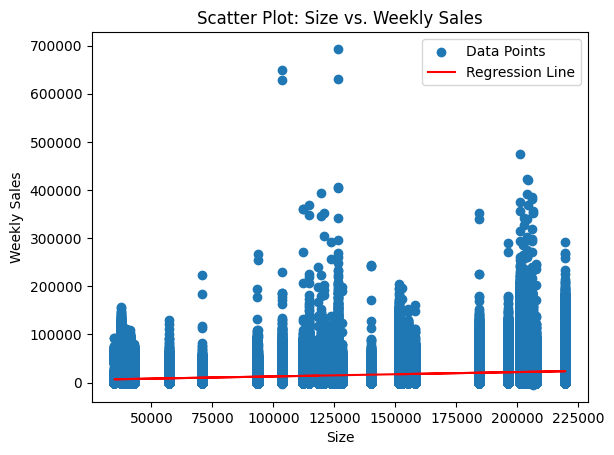

In [ ]:
# Scatter plot weekly sales vs size
plt.scatter(df_final['Size'], df_final['Weekly_Sales'], label='Data Points')
plt.title('Scatter Plot: Size vs. Weekly Sales')
plt.xlabel('Size')
plt.ylabel('Weekly Sales')

# Fitting a linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(df_final['Size'], df_final['Weekly_Sales'])
reg_line = slope * df_final['Size'] + intercept

# Plotting the regression line
plt.plot(df_final['Size'], reg_line, color='red', label='Regression Line')

plt.legend()
plt.show()

# This scatter plot illustrates a positive relationship between store size and weekly sales.
# Notably, weekly sales tend to peak in the range of 100,000 to 130,000 square feet of store size.
# The correlation = 0.244.
# Regression line appears to be horizontal because correlation is low.

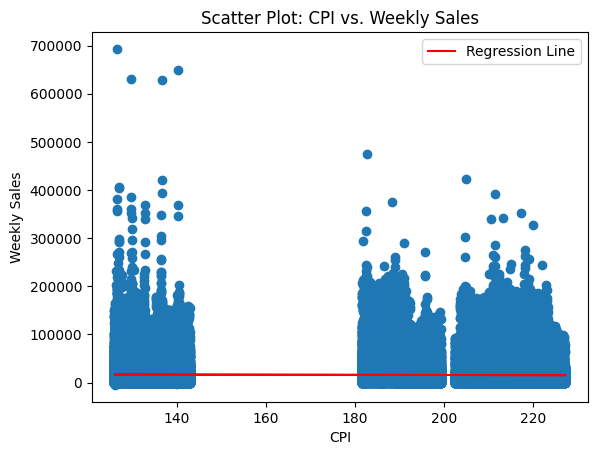

In [ ]:
# Scatter plot weekly sales vs CPI
plt.scatter(df_final['CPI'], df_final['Weekly_Sales'])
plt.title('Scatter Plot: CPI vs. Weekly Sales')
plt.xlabel('CPI')
plt.ylabel('Weekly Sales')

# Adding a regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(df_final['CPI'], df_final['Weekly_Sales'])
plt.plot(df_final['CPI'], intercept + slope * df_final['CPI'], color='red', label='Regression Line')

plt.legend()

plt.show()

# The gap in the plot is due to a noticeable jump in the CPI column.
# It's evident that there's some variability in weekly sales at different CPI values.
# The gap in the plot likely signifies a significant change in the CPI data.
# Correlation = -0.0209
#Regression line appears to be horizontal due to the negative correlation.


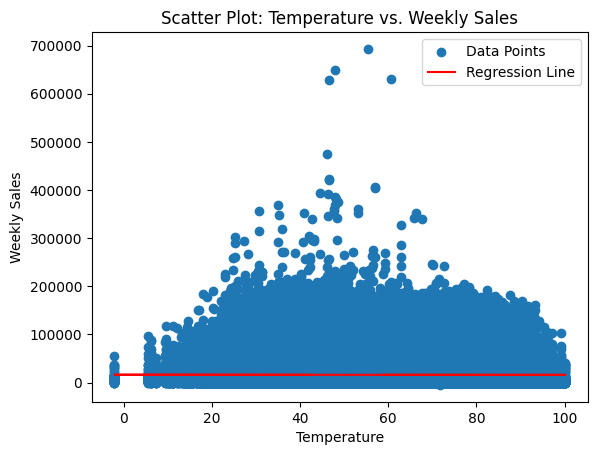

In [ ]:
# Scatter plot weekly sales vs temperature
plt.scatter(df_final['Temperature'], df_final['Weekly_Sales'], label='Data Points')
plt.title('Scatter Plot: Temperature vs. Weekly Sales')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')

# Fitting a linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(df_final['Temperature'], df_final['Weekly_Sales'])
reg_line = slope * df_final['Temperature'] + intercept

# Plotting the regression line
plt.plot(df_final['Temperature'], reg_line, color='red', label='Regression Line')

plt.legend()
plt.show()

# This scatter plot illustrates a negative relationship between temperature and weekly sales.
#The correlation = -0.0023
#The regression line appears to be horizontal due to a negative correlation.


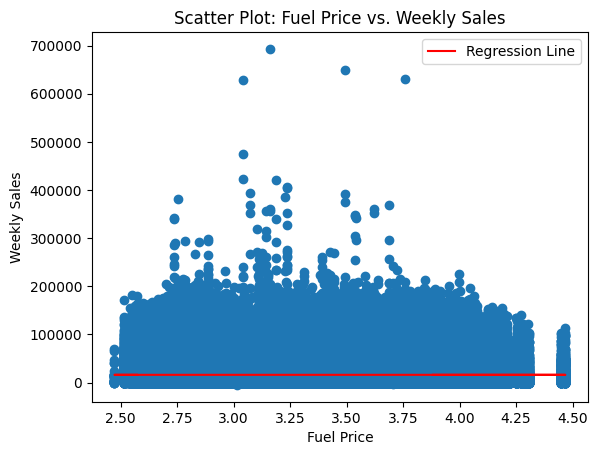

In [ ]:
# Scatter plot weekly sales vs Fuel Price
plt.scatter(df_final['Fuel_Price'], df_final['Weekly_Sales'])
plt.title('Scatter Plot: Fuel Price vs. Weekly Sales')
plt.xlabel('Fuel Price')
plt.ylabel('Weekly Sales')

# Add a regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(df_final['Fuel_Price'], df_final['Weekly_Sales'])
plt.plot(df_final['Fuel_Price'], intercept + slope * df_final['Fuel_Price'], color='red', label='Regression Line')

plt.legend()

plt.show()

# The scatter plot shows the relationship between fuel prices and weekly sales. 
# correlation = -0.0001 
# The regression line appears to be horizontal due to a negative correlation.


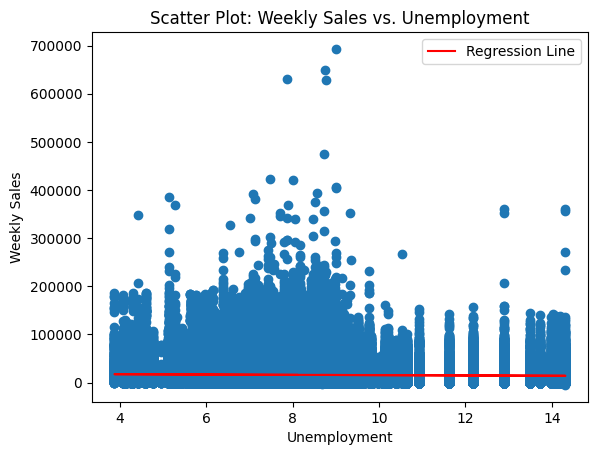

In [ ]:
# Scatter plot weekly sales vs Unemployment
plt.scatter(df_final['Unemployment'], df_final['Weekly_Sales'])
plt.title('Scatter Plot: Weekly Sales vs. Unemployment')
plt.xlabel('Unemployment')
plt.ylabel('Weekly Sales')

# Add a regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(df_final['Unemployment'], df_final['Weekly_Sales'])
plt.plot(df_final['Unemployment'], intercept + slope * df_final['Unemployment'], color='red', label='Regression Line')

plt.legend()

plt.show()

# The scatter plot illustrates the relationship between unemployment rates and weekly sales.
# correlation = -0.025
# The regression line appears to be horizontal due to a negative correlation.


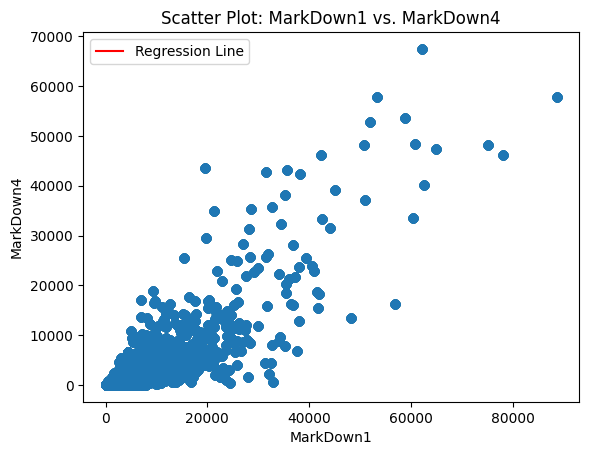

In [ ]:
# Scatter plot weekly sales vs Unemployment
plt.scatter(df_final['MarkDown1'], df_final['MarkDown4'])
plt.title('Scatter Plot: MarkDown1 vs. MarkDown4')
plt.xlabel('MarkDown1')
plt.ylabel('MarkDown4')

# Add a regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(df_final['MarkDown1'], df_final['MarkDown4'])
plt.plot(df_final['MarkDown1'], intercept + slope * df_final['MarkDown4'], color='red', label='Regression Line')

plt.legend()

plt.show()

# The scatter plot illustrates the relationship between MarkDown1 and MarkDown4
# correlation = 0.819
# The regression line did not appear but if it did it would have shown a linear relationship between the 2 markdowns.


## Bivariate Analysis (numerical vs. categorical)

a. Which numeric and categorical columns are you comparing?

b. How does the distribution of the numeric variable change across different categories?

c. Can you visualize the distribution using box plots or violin plots for each category?

d. Are there any categories where the numeric variable seems particularly high or low?

Type vs. Weekly_Sales: Compare how store type (categorical) affects weekly sales (numeric).
IsHoliday vs. Weekly_Sales: Analyze how weekly sales (numeric) vary during holidays (categorical).
HolidayNames vs. Weekly_Sales: Explore how specific holiday names (categorical) influence weekly sales (numeric).
Year vs. Weekly_Sales: Investigate the trend of weekly sales (numeric) over different years (numeric).

In [ ]:
import matplotlib.pyplot as plt
#type_sales= df_final.groupby('Type')['Weekly_Sales'].sum()
#type_sales_plot = type_sales.plot(kind="bar")
#type_sales_plot.set_ylabel('Weekly Sales')
#type_sales_plot.set_title('Weekly Sales of each type of store')

#print(type(type_sales))



<AxesSubplot: xlabel='Type', ylabel='Weekly_Sales'>

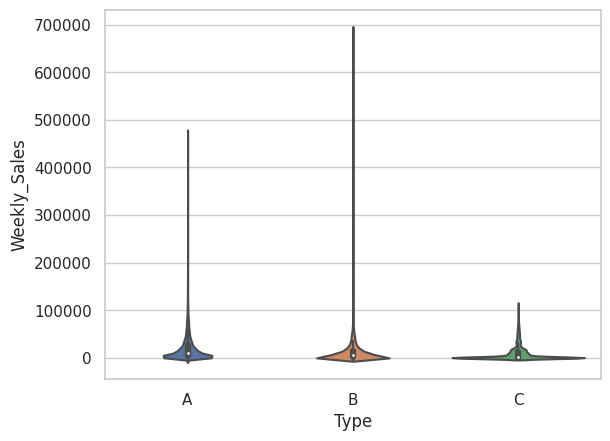

In [ ]:
import seaborn as sns


sns.set(style="whitegrid")  
sns.violinplot(x="Type", y="Weekly_Sales", data=df_final)


#It is seen that type B has the highest weekly sales

<AxesSubplot: xlabel='Type', ylabel='Weekly_Sales'>

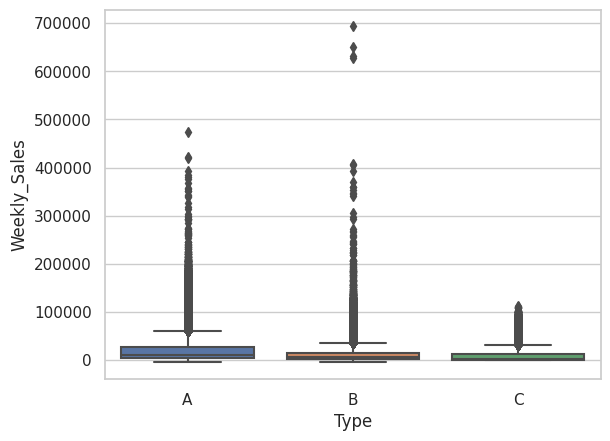

In [ ]:
sns.boxplot(x='Type', y='Weekly_Sales', data=df_final )
#The distribution is not presented well due to the amount of outliers in the columns in the dataframe but because of the outliers it is seen that the max of type A is bigger than B and C

the distribution is not vizualized well due to the amount of outliers in the columns in the dataframe


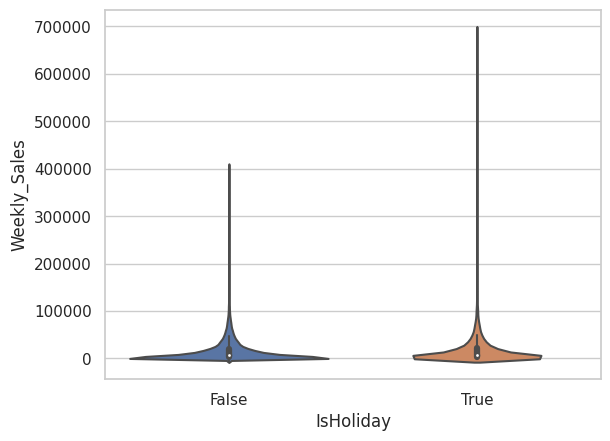

In [ ]:
sns.set(style="whitegrid")  
sns.violinplot(x="IsHoliday", y="Weekly_Sales", data=df_final)
print('the distribution is not vizualized well due to the amount of outliers in the columns in the dataframe')
# It is seen that when its a holiday the average of weekly sales is higher than when it is not

<AxesSubplot: xlabel='IsHoliday', ylabel='Weekly_Sales'>

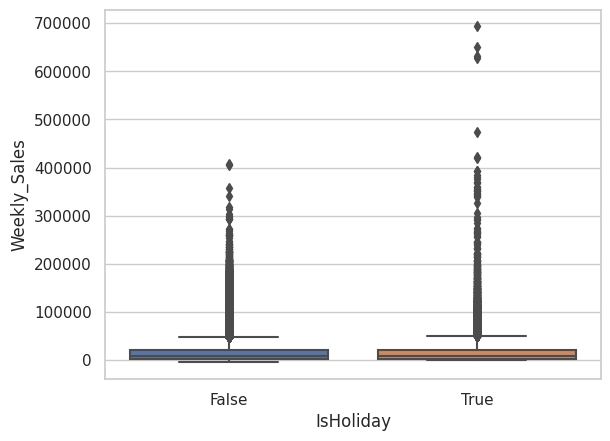

In [ ]:
sns.boxplot(x='IsHoliday', y='Weekly_Sales', data=df_final )
# It is seen that there are some outliers when there is a holiday and the outliers have a high value. At som important holiday dates the amount of weekly sales could be very high

<AxesSubplot: xlabel='HolidayNames', ylabel='Weekly_Sales'>

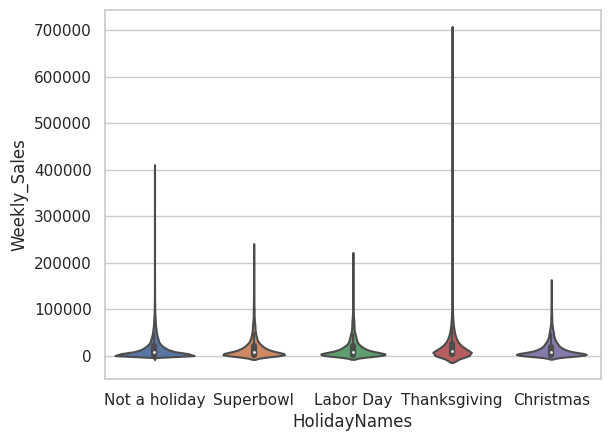

In [ ]:
sns.set(style="whitegrid")  
sns.violinplot(x="HolidayNames", y="Weekly_Sales", data=df_final)
# The holidat with the highest average weekly sales is thanksgiving.


the distribution is not vizualized well due to the amount of outliers in the columns in the dataframe


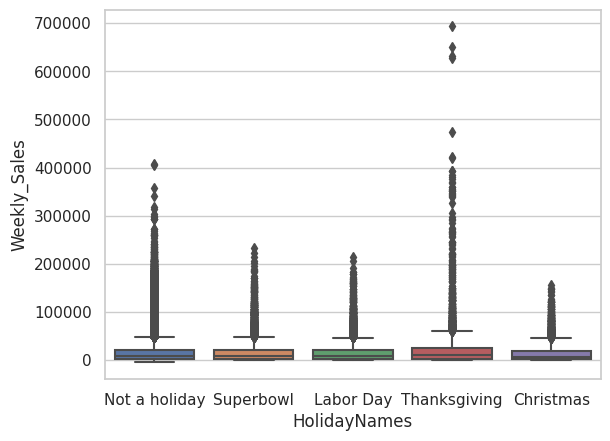

In [ ]:
sns.boxplot(x='HolidayNames', y='Weekly_Sales', data=df_final )
print('the distribution is not vizualized well due to the amount of outliers in the columns in the dataframe')
# The holidat with the highest average weekly sales is thanksgiving.

the distribution is not vizualized well due to the amount of outliers in the columns in the dataframe


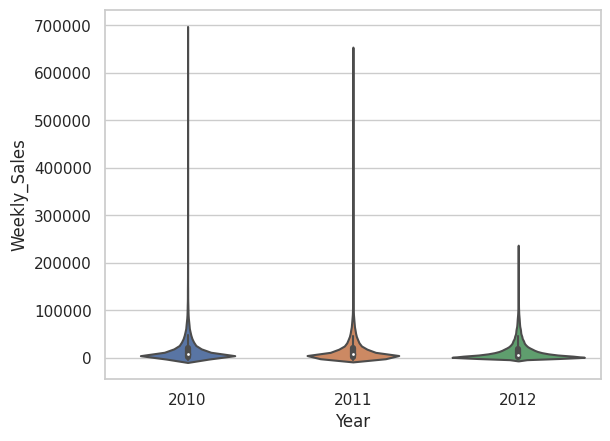

In [ ]:
sns.set(style="whitegrid")  
sns.violinplot(x="Year", y="Weekly_Sales", data=df_final)
print('the distribution is not vizualized well due to the amount of outliers in the columns in the dataframe')
# In 2010 the weekly sales is the highest

the distribution is not vizualized well due to the amount of outliers in the columns in the dataframe


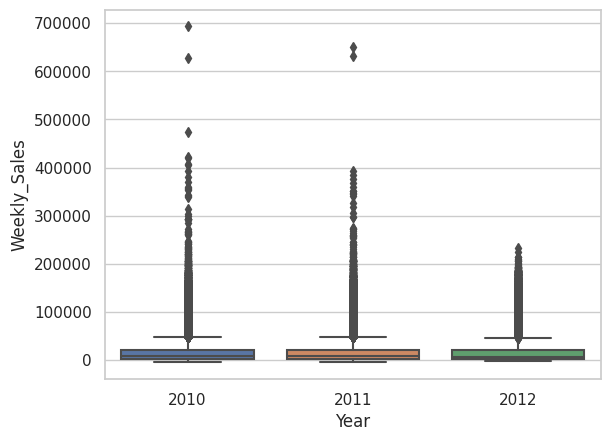

In [ ]:
sns.boxplot(x='Year', y='Weekly_Sales', data=df_final )
print('the distribution is not vizualized well due to the amount of outliers in the columns in the dataframe')

## Bivariate Analysis (categorical vs. categorical)
    a. Which categorical columns are you comparing against each other?
    b. What are the unique combinations of categories between the two columns?
    c. How many data points fall into each combination of categories?
    d. Can you visualize the relationship using a mosaic plot or contingency table?



IsHoliday vs. HolidayNames:**
Type vs. Description:
Super_Bowl vs. Labor_Day vs. Thanksgiving vs. Christmas:**
Date vs. HolidayNames:**

In [ ]:
IsHoliday_HolidayNames = df_final[['IsHoliday','HolidayNames']].drop_duplicates()
Type_Description = df_final[['Type','Description']].drop_duplicates()
Date_HolidayNames = df_final[['Date','HolidayNames']].drop_duplicates()

#Unique combinations and number of data points for each combination:
IsHoliday_HolidayNames

,IsHoliday,HolidayNames
0,False,Not a holiday
1,True,Superbowl
31,True,Labor Day
42,True,Thanksgiving
47,True,Christmas


In [ ]:
Type_Description

,Type,Description
0,A,Candy and Tobacco
143,A,Health and Beauty
286,A,Stationery
429,A,Paper Goods
572,A,Media and Gaming
...,...,...
293534,C,Bakery
293677,C,Store Supplies (non-retail)
327700,A,Gas
351120,C,Furniture


In [ ]:
Date_HolidayNames

,Date,HolidayNames
0,2010-02-05,Not a holiday
1,2010-02-12,Superbowl
2,2010-02-19,Not a holiday
3,2010-02-26,Not a holiday
4,2010-03-05,Not a holiday
...,...,...
138,2012-09-28,Not a holiday
139,2012-10-05,Not a holiday
140,2012-10-12,Not a holiday
141,2012-10-19,Not a holiday


In [ ]:
#Visualizing the relationship using contingency table

import numpy as np
import pandas as pd
import matplotlib as plt
from statsmodels.graphics.mosaicplot import mosaic

contingency_table_ishol = pd.crosstab(index=df_final['IsHoliday'], columns=df_final['HolidayNames'])

contingency_table_ishol

HolidayNames,Christmas,Labor Day,Not a holiday,Superbowl,Thanksgiving
IsHoliday,,,,,
False,0,0,391894,0,0
True,5946,8860,0,8895,5959


In [ ]:
contingency_table_datehol = pd.crosstab(index=df_final['Date'], columns=df_final['HolidayNames'])
contingency_table_datehol

HolidayNames,Christmas,Labor Day,Not a holiday,Superbowl,Thanksgiving
Date,,,,,
2010-02-05,0,0,2955,0,0
2010-02-12,0,0,0,2956,0
2010-02-19,0,0,2976,0,0
2010-02-26,0,0,2950,0,0
2010-03-05,0,0,2943,0,0
...,...,...,...,...,...
2012-09-28,0,0,2961,0,0
2012-10-05,0,0,2975,0,0
2012-10-12,0,0,2989,0,0


In [ ]:
contingency_table_tyde = pd.crosstab(index=df_final['Type'], columns=df_final['Description'])
contingency_table_tyde

Description,Accessories,Aidco (Sub 9),Auto Services,Automotive,Bakery,Bath and Shower,Bedding,Books and Magazines,Boyswear,Bras and Shapewear,...,Shoes,Sleepwear/Scrubs/Underwear,Sporting Goods,Sporting Goods (Sub 9),Stationery,Store Supplies (non-retail),Toys,Toys (Sub 7),Wireless,Wireless Services
Type,,,,,,,,,,,,,,,,,,,,,
A,2936,1085,2290,3146,3146,3139,2948,3146,2889,2860,...,3068,2861,3067,786,3146,829,3146,4,3121,2576
B,2431,851,287,2431,1832,2431,2431,2431,2431,2431,...,2431,2431,2431,608,2431,12,2431,8,2431,1814
C,700,0,0,858,858,462,164,858,86,0,...,855,16,856,0,858,21,858,0,839,0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

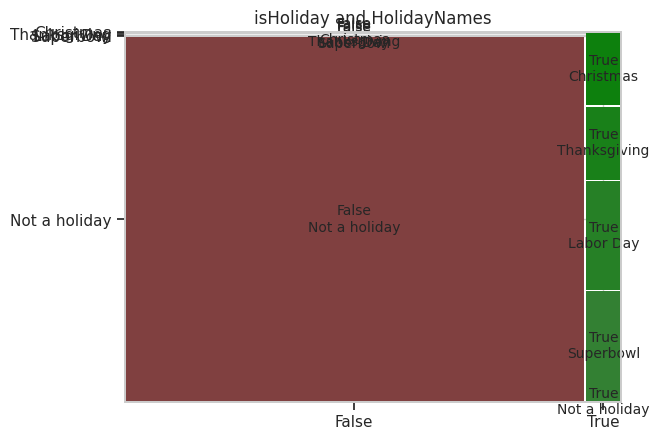

In [ ]:
IsHoliday_HolidayNames_Mosaic = mosaic(df_final,['IsHoliday', 'HolidayNames'], title='isHoliday and HolidayNames')
plt.show()

#The data for IsHoliday and HolidayNames can not be visualized well by a mosaic plot

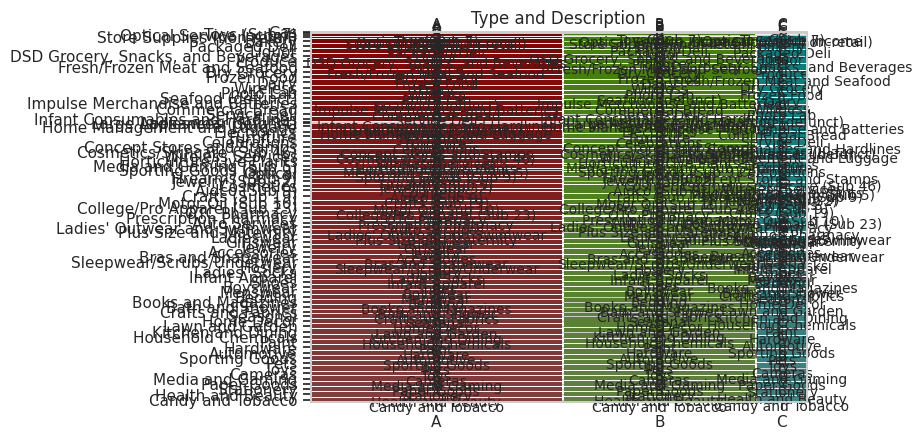

In [ ]:
Type_Description_Mosaic = mosaic(df_final,['Type', 'Description'], title='Type and Description')
plt.show()

#The data for type and description can not be visualized well by a mosaic plot


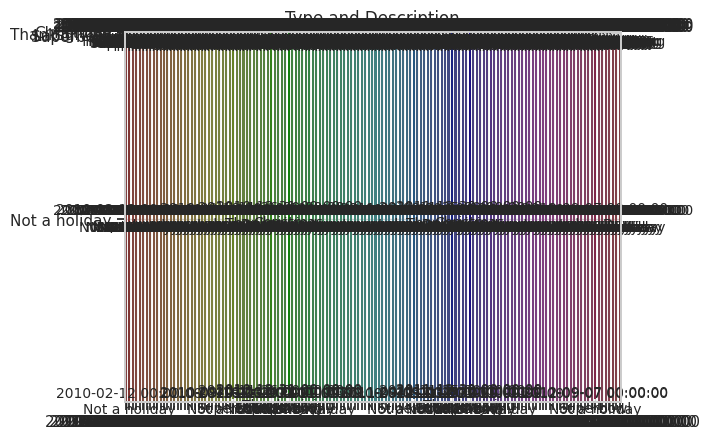

In [ ]:
Date_Holiday_Mosaic = mosaic(df_final,['Date', 'HolidayNames'], title='Type and Description')
plt.show()

#The data for Date and HolidayNames can not be visualized well by a mosaic plot

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=755e957e-1a32-4030-9372-201dbf660aae' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>